# Task 1: Linear Regression Model for Refugee Acceptance Prediction

### Use Case:
We aim to predict the **acceptance rate of asylum applications** in different countries. This helps inform decision-making for refugee support and planning. The data is extracted from the UNHCR refugee datasets.

---

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and Explore Data
We load the data and explore its structure to understand the columns and values.

# Step 1: Introduction - Mission and Use Case

In [2]:
# Load dataset
df = pd.read_csv("asylum_seekers.csv")
df.head()

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0


In [4]:

african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 
    'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 
    'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 
    'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 
    'Zambia', 'Zimbabwe'
]

# Filter for African data
df = df[df['Country / territory of asylum/residence'].isin(african_countries)]


### Step 3: Data Cleaning and Preprocessing
- Convert numerical columns
- Handle missing data
- Create new features like `acceptance_rate`

# Step 2: Load the Refugee Dataset

In [5]:
# Clean numeric columns
numeric_columns = [
    'Year', 'Tota pending start-year', 'of which UNHCR-assisted(start-year)',
    'Applied during year', 'decisions_recognized', 'decisions_other',
    'Rejected'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('*', '').str.replace('-', '0'), errors='coerce')

df = df.fillna(0)

# Feature engineering
df['acceptance_rate'] = df['decisions_recognized'] / (df['decisions_recognized'] + df['Rejected'] + df['decisions_other']).replace(0, 1)
df['total_processed'] = df['decisions_recognized'] + df['Rejected'] + df['decisions_other']

### Step 4: Visualizations
- Bar plots, scatter plots, line plots and correlation heatmap

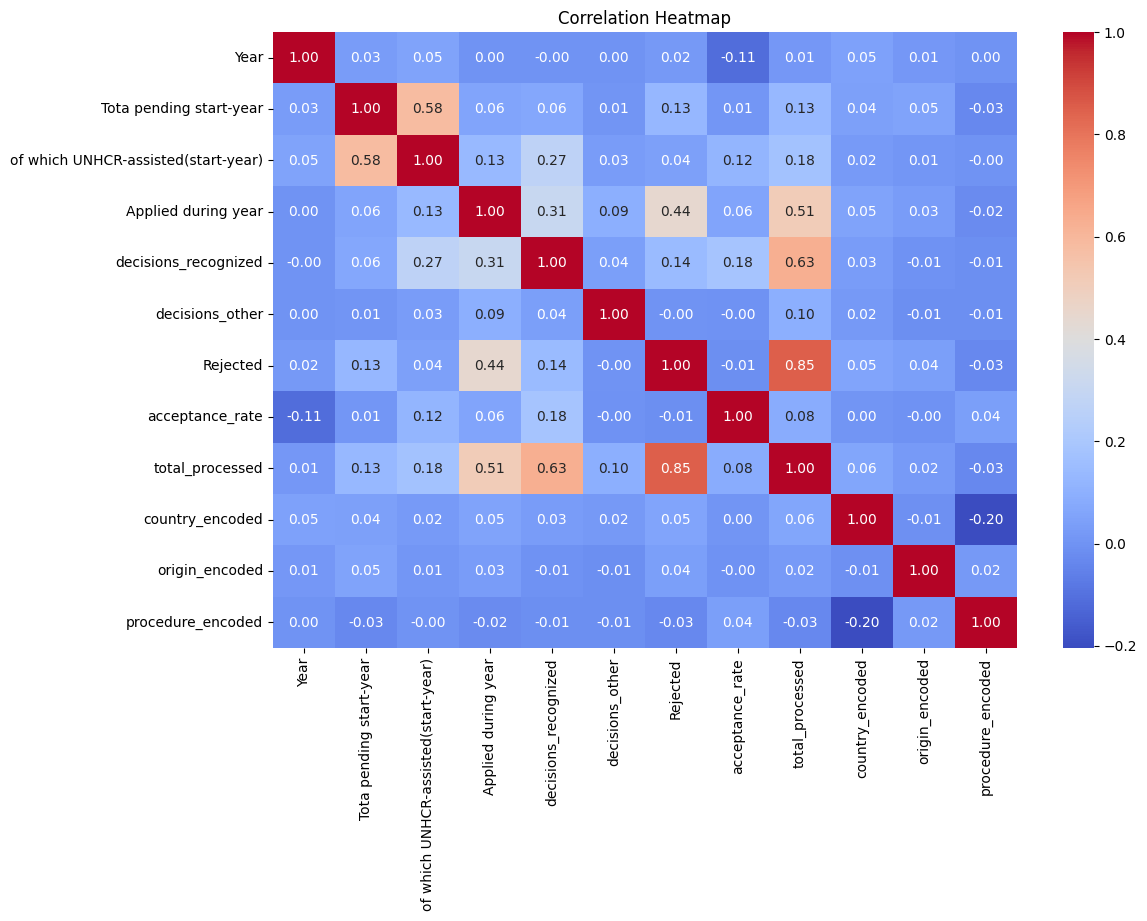

In [16]:
#correlation heatmap and scatter plot
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Step 5: Feature Engineering
- Encoding categorical data
- Selecting numeric + encoded features
- Filtering meaningful data points

# Step 3: Data Exploration

In [6]:
# Encode and prepare model data
le_country = LabelEncoder()
le_origin = LabelEncoder()
le_procedure = LabelEncoder()

df['country_encoded'] = le_country.fit_transform(df['Country / territory of asylum/residence'].astype(str))
df['origin_encoded'] = le_origin.fit_transform(df['Origin'].astype(str))
df['procedure_encoded'] = le_procedure.fit_transform(df['RSD procedure type / level'].astype(str))

features = ['country_encoded', 'origin_encoded', 'procedure_encoded', 'Year', 'Applied during year',
            'Tota pending start-year', 'of which UNHCR-assisted(start-year)', 'decisions_other']
X = df[features]
y = df['acceptance_rate']

### Step 6: Train-Test Split and Standardization

# Step 4: Data Cleaning and Preprocessing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 7: Train Linear Regression Model & Evaluate

# Step 5: Visualizations and Interpretation

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

R² Score: 0.0375


### Step 8: Compare with Decision Tree & Random Forest

# Step 6: Feature Engineering and Label Encoding

In [10]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train_scaled, y_train)
print("Decision Tree R²:", r2_score(y_test, dt.predict(X_test_scaled)))

# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)
print("Random Forest R²:", r2_score(y_test, rf.predict(X_test_scaled)))
plt.show()

Decision Tree R²: 0.08072848340113181
Random Forest R²: 0.251805316149903


### Step 9: Save Best Model

# Step 7: Train-Test Split and Standardization

In [ ]:
joblib.dump(rf, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(features, 'feature_columns.pkl')

print("Model and encoders saved successfully.")

['feature_columns.pkl']

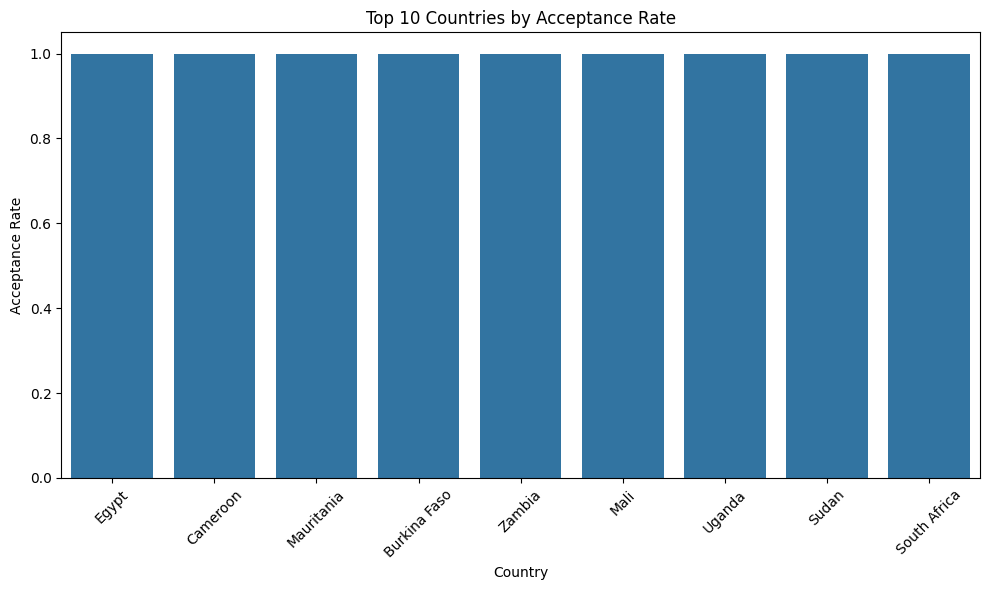

In [11]:
#visualize the data and interpret the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Country / territory of asylum/residence', y='acceptance_rate',
            data=df.sort_values('acceptance_rate', ascending=False).head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Acceptance Rate')
plt.xlabel('Country')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

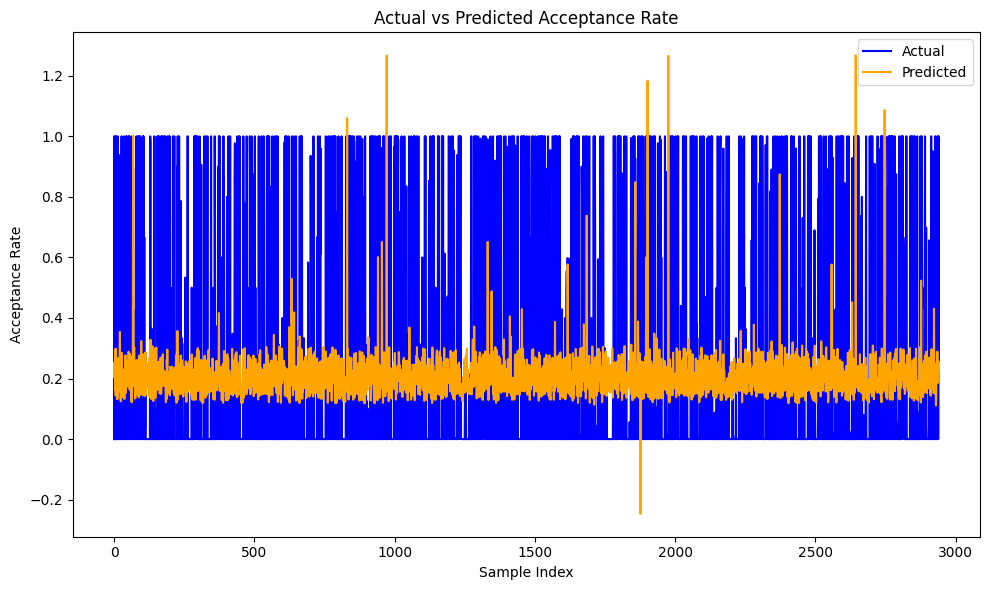

In [12]:
# plot the loss curve for test data and train data.
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Acceptance Rate')
plt.xlabel('Sample Index')
plt.ylabel('Acceptance Rate')
plt.legend()
plt.tight_layout()

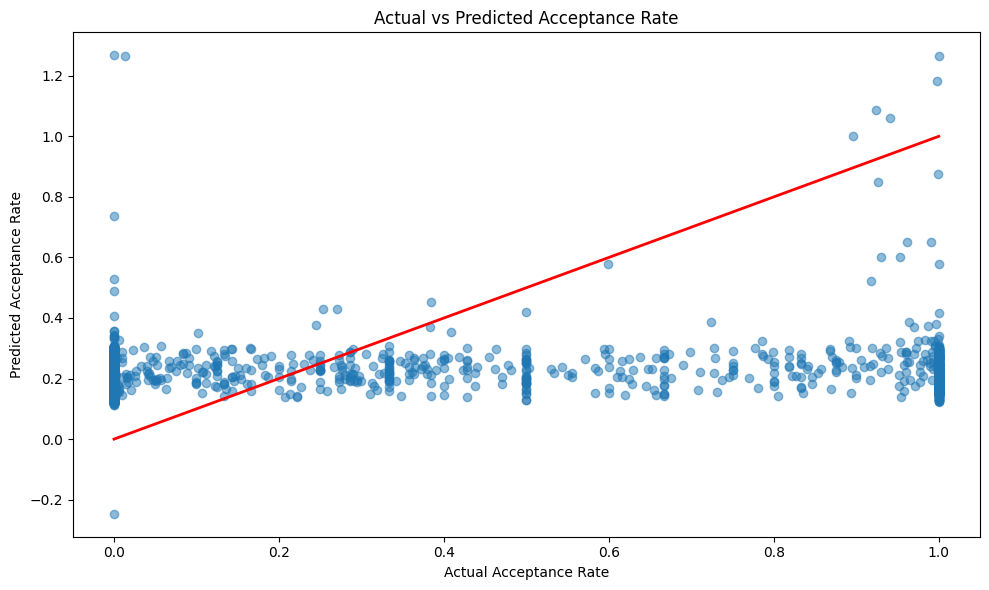

In [13]:
# Plot a scatter plot of before and after showing where the linear line passes through the  data

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max
()], color='red', lw=2)
plt.title('Actual vs Predicted Acceptance Rate')
plt.xlabel('Actual Acceptance Rate')
plt.ylabel('Predicted Acceptance Rate')
plt.tight_layout()
plt.show()